## Introduction
For this assignment, I'll be exploring a subset (n=1000) of motor vehicle collisions/crashes data for New York City. I selected this dataset since I'll be analyzing a similar vehicle crash dataset from Pennsylvania for my DATA602 final project.

Link to Data: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data

Link to Data Dictionary: https://data.cityofnewyork.us/api/views/h9gi-nx95/files/bd7ab0b2-d48c-48c4-a0a5-590d31a3e120?download=true&filename=MVCollisionsDataDictionary_20190813_ERD.xlsx


## Data Exploration

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

crash_data = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv")

print(crash_data.info(),"\n")

print("Descriptive Statistics of each Column:\n",crash_data.describe(),"\n")

print("Missing Values in each Column:\n", crash_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_date                     1000 non-null   object 
 1   crash_time                     1000 non-null   object 
 2   borough                        630 non-null    object 
 3   zip_code                       629 non-null    float64
 4   latitude                       915 non-null    float64
 5   longitude                      915 non-null    float64
 6   location                       915 non-null    object 
 7   on_street_name                 742 non-null    object 
 8   off_street_name                450 non-null    object 
 9   cross_street_name              258 non-null    object 
 10  number_of_persons_injured      1000 non-null   int64  
 11  number_of_persons_killed       1000 non-null   int64  
 12  number_of_pedestrians_injured  1000 non-null   in

## Data Wrangling
Data exploration reveals a number of columns that are populated with mostly null values. It was decided to remove these columns from the dataframe. Additionally, any rows with missing values were also removed. As a result of these drops, the resulting dataframe shape was reduced to 386 records with 20 features. Lastly, the data in the "crash_date" column was converted to a datetime objects to facilitate downstream graphing.

In [2]:
#drop columns with mostly missing values
crash_data.drop(['off_street_name','cross_street_name', 'contributing_factor_vehicle_3',
                 'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
                 'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5','on_street_name'],
                 axis=1,inplace=True)

#drop any rows with missing values
crash_data.dropna(inplace = True)

#print updated dataframe information
print("Updated dataframe shape:", crash_data.shape, "\n")
print("Missing Values in each Column:\n", crash_data.isnull().sum(),"\n")

#convert "crash_date" column to datatime object
crash_data['crash_date'] = pd.to_datetime(crash_data['crash_date'])

Updated dataframe shape: (386, 20) 

Missing Values in each Column:
 crash_date                       0
crash_time                       0
borough                          0
zip_code                         0
latitude                         0
longitude                        0
location                         0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
contributing_factor_vehicle_1    0
contributing_factor_vehicle_2    0
collision_id                     0
vehicle_type_code1               0
vehicle_type_code2               0
dtype: int64 



## Visualizations: Part 1 (matplotlib)
Two graphs were graphed below using matplotlib. The first graph compares the daily totals of injured motorists and injured pedestrians over time. The second graph compares the totals of injured motorists in the data set by borough. Between these two graphs, the following properties were explored:

*Use and change a legend position

*Change a legend font size

*Place a legend outside of the plot

*Change the title and x/y labels

*Change the marker, line colors, and line width

*Modify Axis Text Ticks/Labels

*Change size of axis Labels

*Set a style for the graph



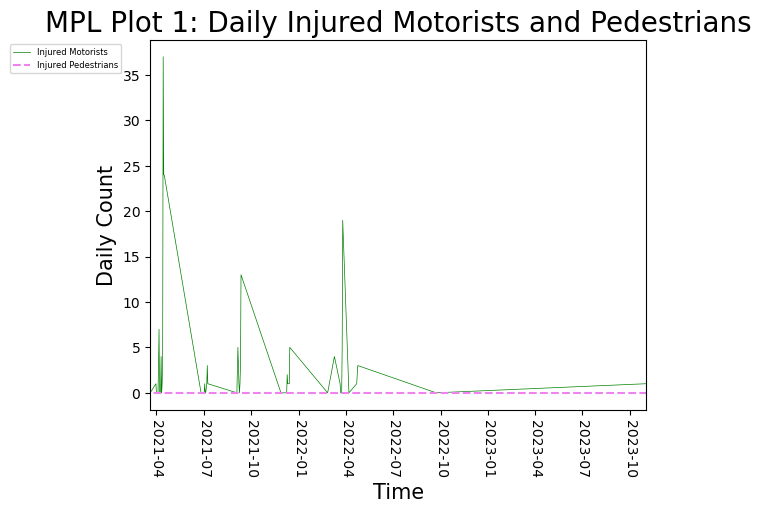

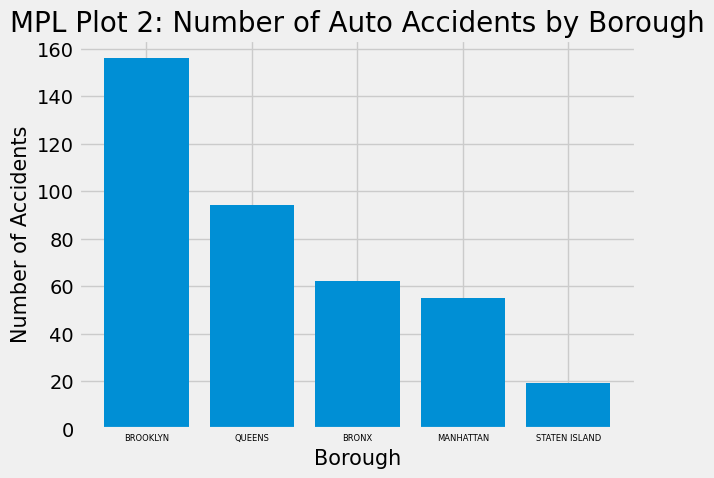

In [3]:
# matplotlib plot #1: line chart comparing daily injured motorists and pedestrians

#Sort by date and sum totals for injured motorists and pedestrians
crash_data.sort_values(by='crash_date', inplace=True)
motorist_sum = crash_data.groupby('crash_date')['number_of_motorist_injured'].sum().reset_index()
ped_sum = crash_data.groupby('crash_date')['number_of_pedestrians_injured'].sum().reset_index()

#plot graphs
# matplotlib plot #1: line chart comparing daily injured motorists and pedestrians
plt.style.use('default')
plt.plot(motorist_sum['crash_date'], motorist_sum['number_of_motorist_injured'], color='green', linewidth=.5,
         label="Injured Motorists")
plt.plot(ped_sum['crash_date'], ped_sum['number_of_pedestrians_injured'], color='violet', linestyle="--",
         label="Injured Pedestrians")
plt.title("MPL Plot 1: Daily Injured Motorists and Pedestrians", fontsize=20)
plt.ylabel("Daily Count", fontsize=15)
plt.xlabel("Time", fontsize=15)
plt.xticks(rotation=-90)
plt.legend(fontsize=6,loc='upper right', bbox_to_anchor=(-0.05, 1))
plt.xlim(pd.Timestamp('2021-03-20'), pd.Timestamp('2023-11-01'))
plt.show()

# matplotlib plot #2: bar chart showing the total auto accidents occuring in each borough
plt.style.use('fivethirtyeight')
plt.bar(crash_data['borough'].value_counts().index, crash_data['borough'].value_counts().values)
plt.title("MPL Plot 2: Number of Auto Accidents by Borough", fontsize=20)
plt.ylabel("Number of Accidents", fontsize=15)
plt.xlabel("Borough", fontsize=15)
plt.xticks(fontsize=6)
plt.show()

## Visualizations: Part 2 (seaborn)
Two graphs were graphed below using seaborn. The first graph compares the daily totals of injured motorists and injured pedestrians over time. The second graph compares the totals of injured motorists in the data set by borough. Between these two graphs, the following properties were explored:

*Use and change a legend position

*Change a legend font size

*Place a legend outside of the plot

*Change the title and x/y labels

*Change the marker, line colors, and line width

*Modify Axis Text Ticks/Labels

*Change size of axis Labels

*Set a style for the graph

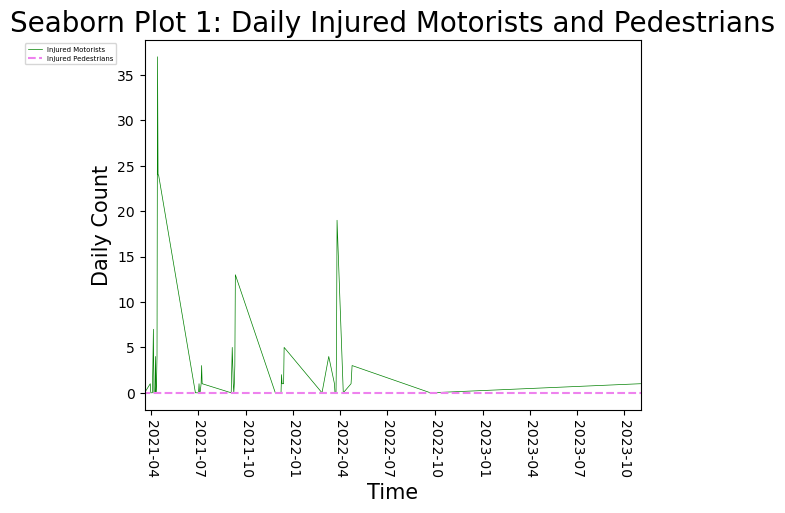

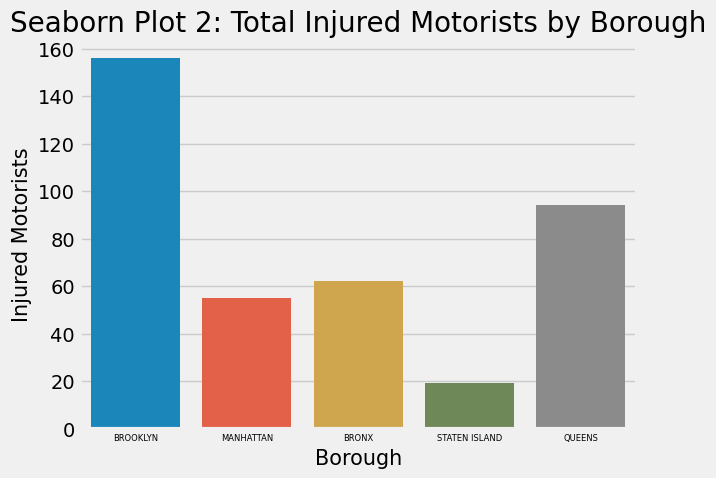

In [4]:
# Plot graphs
#seaborn plot #1: line chart comparing daily injured motorists and pedestrians
plt.style.use('default')
sns.lineplot(x="crash_date", y="number_of_motorist_injured", data=crash_data, label="Injured Motorists",
             color='green', linewidth=.5, estimator="sum", ci=None)
sns.lineplot(x="crash_date", y="number_of_pedestrians_injured", data=crash_data, label="Injured Pedestrians",
             color='violet', linestyle="--", estimator="sum", ci=None)
plt.title("Seaborn Plot 1: Daily Injured Motorists and Pedestrians", fontsize=20)
plt.ylabel("Daily Count", fontsize=15)
plt.xlabel("Time", fontsize=15)
plt.xticks(rotation=-90)
plt.xlim(pd.Timestamp('2021-03-20'), pd.Timestamp('2023-11-01'))
plt.legend(fontsize=5,loc='upper right', bbox_to_anchor=(-0.05, 1))
plt.show()

# seaborn plot #2: bar chart showing the total auto accidents occuring in each borough
plt.style.use('fivethirtyeight')
sns.countplot(x="borough", data=crash_data)
plt.title("Seaborn Plot 2: Total Injured Motorists by Borough", fontsize=20)
plt.ylabel("Injured Motorists", fontsize=15)
plt.xlabel("Borough", fontsize=15)
plt.xticks(fontsize=6)
plt.show()

## Visualizations Part 3: Comparing matplotlib and seaborn

For Plot 1 in the respective parts, which was a line graph displaying both the daily number of injured motorists and pedestrians over time, there was a significant difference in how the daily sums were prepared. While the lineplot method in seaborn includes an esimator parameter that could be set to "sum" to derive the totals for each date, matplotlib has no such parameter; thus, the daily totals had to be computed outside the graphing function. 

For Plot 2 in the respective parts, which was a bar graph displaying the total number of motorists injured in each NYC borough, there was some difference in how easily the counts for each borough were derived. The seaborn countplot method automatically detects unique categories and counts the instances in each for graphing. However, matplotlib has no such functionality, so the indices and values derived from the value_counts() method were graphed, which is a bit clunkier to code and read.

Each of the above instances showcase how seaborn is more streamlined and flexible than matplotlib.

## Conclusions
Regarding the number of injured motorists over time (Plot 1), generally less that 5 people are injured on a daily basis, with occasional large spikes. Interestingly, the number of pedestrians injured over time was consistently 0 over time, which likely represents a flaw in how the data is recorded in that the 0's in this column actually probably are missing data.

Plot 2 shows the total number of injured motorists in each borough. There are clear differences betweent the five boroughs, but not being a resident of NYC, it is tough to judge whether these differences align with intuition. Taking the data at face value, I might surmise that Brooklyn has denser traffic, worse road design, higher speed limits, etc. or some combination of the prior that led to more injuries. Ultimately, the "why" of this observation is not addressed in this data set.
